<a href="https://colab.research.google.com/github/YusolCho/Game_Analysis/blob/main/GOLD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

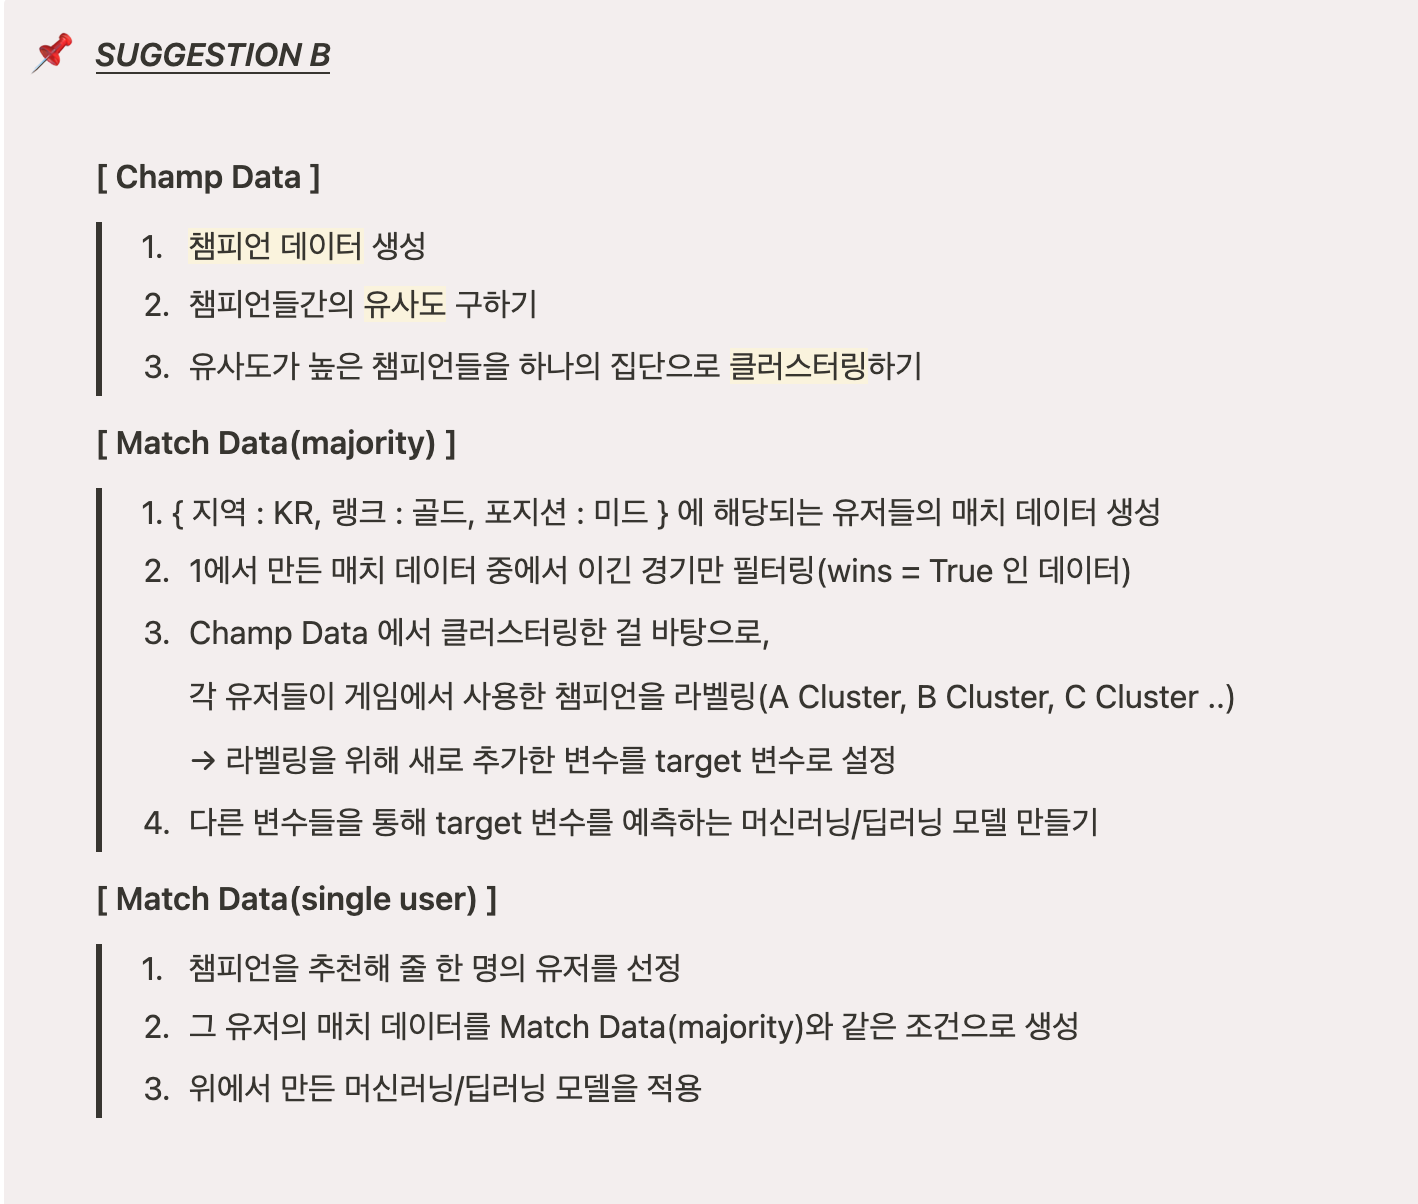

# **1. EDA**

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# 데이터 로드
gold = pd.read_csv('/content/drive/MyDrive/LOL_ANALYSIS_0323/GOLD_WIN.csv')
print(gold.info())
print(gold.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6986 entries, 0 to 6985
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   assists       6986 non-null   int64 
 1   kills         6986 non-null   int64 
 2   deaths        6986 non-null   int64 
 3   champExp      6986 non-null   int64 
 4   champName     6986 non-null   object
 5   indiPos       6986 non-null   object
 6   lane          6986 non-null   object
 7   role          6986 non-null   object
 8   gold          6986 non-null   int64 
 9   teamPos       6986 non-null   object
 10  tDDealt       6986 non-null   int64 
 11  tDDealtChamp  6986 non-null   int64 
 12  tDTaken       6986 non-null   int64 
 13  tMKilled      6986 non-null   int64 
 14  turKills      6986 non-null   int64 
 15  win           6986 non-null   bool  
 16  division      6986 non-null   int64 
dtypes: bool(1), int64(11), object(5)
memory usage: 880.2+ KB
None
   assists  kills  deaths  c

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt

## **1-1.일원 변수 분석**

### **1-1-1.assists**

count    6986.000000
mean        7.426854
std         4.415485
min         0.000000
25%         4.000000
50%         7.000000
75%        10.000000
max        33.000000
Name: assists, dtype: float64


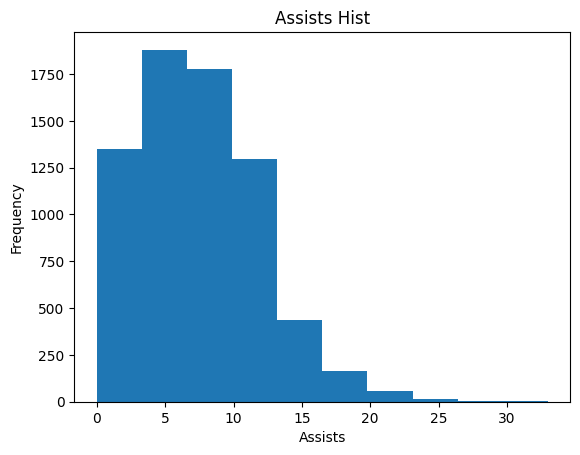

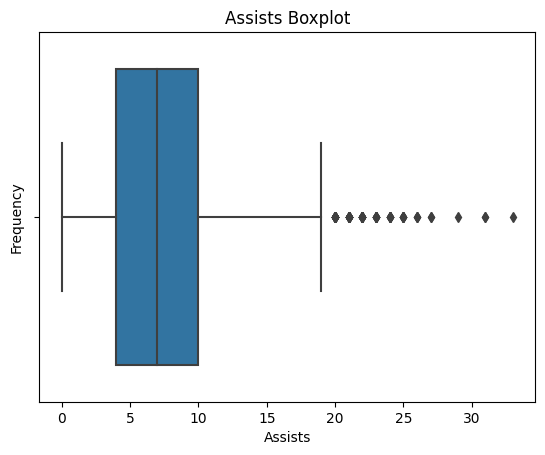

In [4]:
print(gold['assists'].describe())

plt.hist(gold['assists'])
plt.title('Assists Hist')
plt.xlabel('Assists')
plt.ylabel('Frequency')
plt.show()

import seaborn as sns
sns.boxplot(x=gold['assists'])
plt.title('Assists Boxplot')
plt.xlabel('Assists')
plt.ylabel('Frequency')
plt.show()

# right-skewed

### **1-1-2. kills**

count    6986.000000
mean        8.077441
std         4.727402
min         0.000000
25%         5.000000
50%         7.000000
75%        11.000000
max        31.000000
Name: kills, dtype: float64


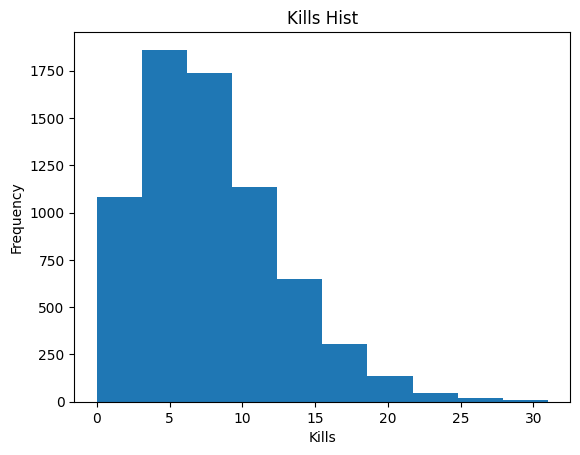

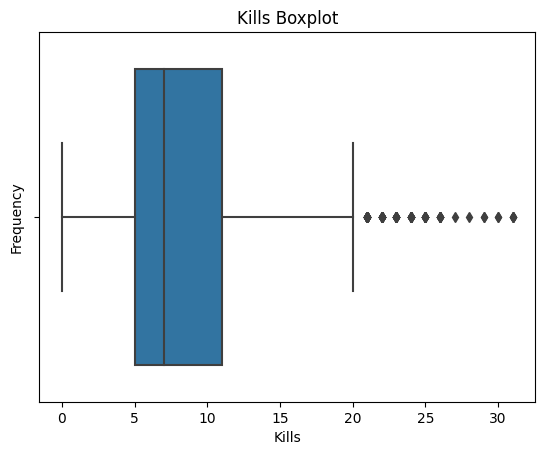

In [5]:
print(gold['kills'].describe())

plt.hist(gold['kills'])
plt.title('Kills Hist')
plt.xlabel('Kills')
plt.ylabel('Frequency')
plt.show()

# right skewed 

sns.boxplot(x=gold['kills'])
plt.title('Kills Boxplot')
plt.xlabel('Kills')
plt.ylabel('Frequency')
plt.show()

### **1-1-3. deaths** 

count    6986.000000
mean        4.450186
std         2.979749
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        20.000000
Name: deaths, dtype: float64


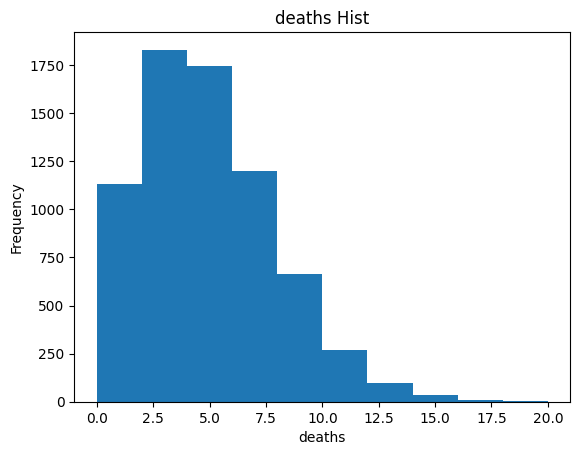

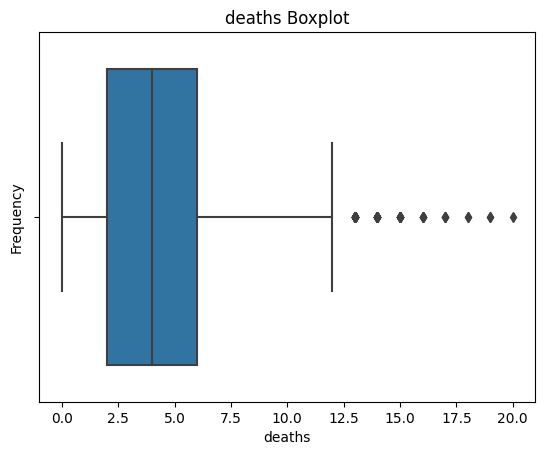

In [6]:
print(gold['deaths'].describe())

plt.hist(gold['deaths'])
plt.title('deaths Hist')
plt.xlabel('deaths')
plt.ylabel('Frequency')
plt.show()

# right skewed 

sns.boxplot(x=gold['deaths'])
plt.title('deaths Boxplot')
plt.xlabel('deaths')
plt.ylabel('Frequency')
# Display the boxplot
plt.show()

# right-skewed

### **1-1-4. champExp**

count     6986.000000
mean     14965.196106
std       4444.887984
min          0.000000
25%      12140.250000
50%      15051.000000
75%      17753.750000
max      39524.000000
Name: champExp, dtype: float64


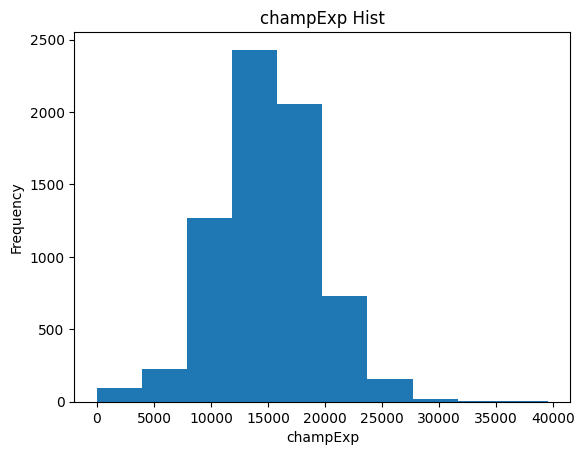

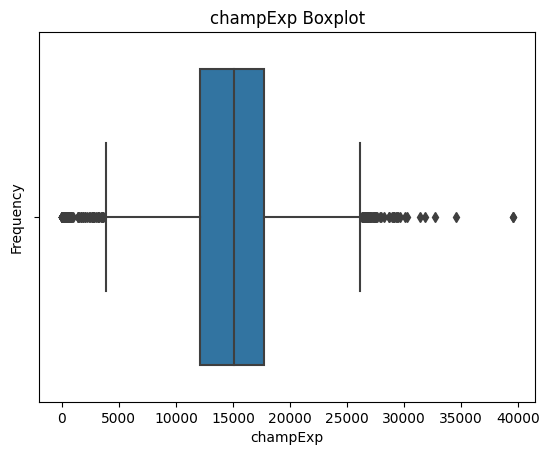

In [7]:
print(gold['champExp'].describe())

plt.hist(gold['champExp'])
plt.title('champExp Hist')
plt.xlabel('champExp')
plt.ylabel('Frequency')
plt.show()

# right skewed 

sns.boxplot(x=gold['champExp'])
plt.title('champExp Boxplot')
plt.xlabel('champExp')
plt.ylabel('Frequency')
plt.show()

# right-skewed

### **1-1-5. ChampName**

In [8]:
print('포함된 챔피언 종류 : ', gold['champName'].nunique(), '종')
print(gold.groupby('champName')['champName'].count())
# 챔피언 별로 데이터양 불균형이 심함 

포함된 챔피언 종류 :  135 종
champName
Aatrox      20
Ahri       324
Akali      283
Akshan      88
Alistar      6
          ... 
Zeri         8
Ziggs        4
Zilean       5
Zoe         91
Zyra         2
Name: champName, Length: 135, dtype: int64


In [9]:
# 챔피언 종류별 데이터수 측정 
champ_type_counts = gold['champName'].value_counts().values

Text(0, 0.5, 'Frequency')

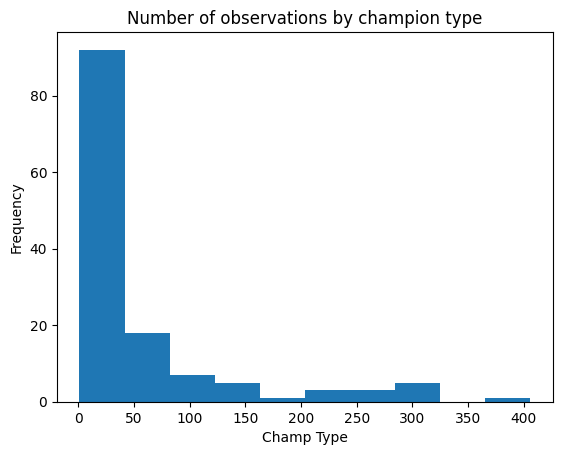

In [10]:
plt.hist(champ_type_counts)
plt.title('Number of observations by champion type')
plt.xlabel('Champ Type')
plt.ylabel('Frequency')
#데이터 불균형이 매우! 심하다.

In [11]:
# 데이터 양이 많은 챔피언
a = gold.groupby('champName')
a['champName'].count().sort_values(ascending = False)[0:40]

champName
Zed            406
Irelia         324
Ahri           324
Yasuo          309
Yone           304
Leblanc        285
Akali          283
Sylas          275
Viktor         265
AurelionSol    239
Katarina       231
Talon          215
Vex            191
Pantheon       145
Annie          143
TwistedFate    132
Kassadin       127
Cassiopeia     124
Syndra         113
Fizz           108
Ryze            96
Zoe             91
Akshan          88
Ekko            88
Veigar          88
Rumble          79
Azir            74
Jayce           74
Lissandra       73
Orianna         72
Malzahar        71
Galio           71
Diana           71
Anivia          70
Vladimir        70
Lux             68
Malphite        59
Qiyana          59
Sett            53
Xerath          52
Name: champName, dtype: int64

In [35]:
# 데이터 양이 적은 챔피언 
a['champName'].count().sort_values(ascending = True)[0:58]


# 총 145 종의 챔피언 중에서 어느 정도는 지워나가야 할 것 
# 아래의 챔피언들은 1만개가 넘는 데이터 중에서 사용 빈도가 10 아래인 챔피언들이다. 해당 데이터는 자체적으로 삭제하는 것을 생각해보아야한다. 
# 마찬가지로, 챔피언 중에서 챔피언 데이터에 없는 것들은 어떻게 처리해야할 지 고민해보아야한다. 

champName
Warwick         1
Trundle         1
Illaoi          1
Ivern           1
Vi              1
Kayn            1
Khazix          1
Caitlyn         1
Elise           1
KogMaw          1
FiddleSticks    1
Senna           1
Leona           1
Rengar          1
RekSai          1
MissFortune     1
Nautilus        1
Xayah           1
Milio           2
Shaco           2
Sivir           2
MonkeyKing      2
Thresh          2
Zyra            2
Skarner         2
Volibear        2
Shyvana         3
Lulu            3
Belveth         3
DrMundo         3
Aphelios        3
Teemo           4
Graves          4
Kled            4
Seraphine       4
Draven          4
Ziggs           4
Samira          4
Heimerdinger    5
Nocturne        5
Twitch          5
Jhin            5
Zilean          5
Camille         6
Kayle           6
Tryndamere      6
Alistar         6
Darius          6
JarvanIV        6
Garen           6
Gwen            6
Yorick          7
Riven           7
Jax             7
Zeri            8


### **1-1-6. indiPos**

In [13]:
gold.groupby('indiPos')['indiPos'].count()
# indiPos, lane 이 MIDDLE 이 아닌 것들은 어떻게 해야할지.. 

indiPos
JUNGLE      15
MIDDLE    6965
TOP          6
Name: indiPos, dtype: int64

In [15]:
# indiPos 가 JUNGLE 인 데이터 탐색 
gold[gold['indiPos']=='JUNGLE']['lane'].sort_values()  # lane이 MIDDLE 인 게 12개

# 이 12개는 indiPos 는 정글, teamPos와 lane은 미드
# 나머지 22개는 teamPos만 미드 (indiPos 는 정글, lane은 다양)
# indiPos, teamPos, lane 중 2개 이상이 MIDDLE 이 아닌 데이터를 어떻게 처리해야 할까?

576     BOTTOM
2519    BOTTOM
5261    BOTTOM
1334    MIDDLE
2542    MIDDLE
2806    MIDDLE
6632    MIDDLE
550       NONE
910       NONE
913       NONE
1589      NONE
1755      NONE
1761      NONE
1980      NONE
3535      NONE
Name: lane, dtype: object

In [16]:
# indiPos 가 TOP 인 데이터 탐색 
gold[gold['indiPos']=='TOP']

# Index 806 도 assists, kills, deaths 가 모두 0이다. champExp, gold, tDDealt, tDDealtChamp, tDTaken, tMKilled 모두 현저히 낮다 -> 삭제?
# Index 2224도 그닥.. 

,assists,kills,deaths,champExp,champName,indiPos,lane,role,gold,teamPos,tDDealt,tDDealtChamp,tDTaken,tMKilled,turKills,win,division
806,0,0,0,168,Zed,TOP,NONE,SUPPORT,606,MIDDLE,971,207,202,4,0,True,1
2224,1,0,1,331,Ahri,TOP,NONE,SUPPORT,683,MIDDLE,1522,621,1200,4,0,True,2
2674,3,7,3,13954,Vayne,TOP,JUNGLE,NONE,11987,MIDDLE,120152,17811,13522,157,3,True,2
2885,12,10,15,13573,Camille,TOP,MIDDLE,SOLO,11706,MIDDLE,113184,35461,43725,117,0,True,2
4486,6,3,2,13967,DrMundo,TOP,TOP,DUO,9886,MIDDLE,126721,11145,23067,186,1,True,3
4532,12,10,15,13573,Camille,TOP,MIDDLE,SOLO,11706,MIDDLE,113184,35461,43725,117,0,True,3


### **1-1-7. lane**

In [17]:
gold.groupby('lane')['lane'].count()  

# indiPos 에서보다 MIDDLE 이 아닌 것들이 훨씬 많다 
# lane 이 애초에 크게 중요한 변수가 아닌건지..?
# 그리고 NONE 으로 표기된 데이터가 무려 772개나 된다. 

lane
BOTTOM      34
JUNGLE      34
MIDDLE    5695
NONE       772
TOP        451
Name: lane, dtype: int64

In [18]:
gold[gold['lane'] != 'MIDDLE']['gold'].describe()   # lane 이 MIDDLE 이 아닌 애들이 허수인지 알아보기 위해 gold 량을 분석 

# gold 변수도 이따 봐보고 수치가 어떤지 판단해볼 것 

count     1291.000000
mean      9331.374903
std       4281.700818
min        500.000000
25%       6784.500000
50%       8686.000000
75%      12112.000000
max      24060.000000
Name: gold, dtype: float64

In [19]:
#lane 이 NONE 인 애들의 변수별 평균
gold[gold['lane'] == 'NONE'].agg('mean')

<ipython-input-19-d02850ec7e3c>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  gold[gold['lane'] == 'NONE'].agg('mean')


assists             2.966321
kills               4.522021
deaths              1.435233
champExp         7574.752591
gold             6716.589378
tDDealt         60138.220207
tDDealtChamp     8864.303109
tDTaken          7958.909326
tMKilled          105.546632
turKills            0.682642
win                 1.000000
division            2.392487
dtype: float64

In [20]:
# 전체 데이터의 변수별 평균
gold.agg('mean')

# 결론 : lane 값이 NONE 인 애들은 win, division 변수를 제외한 다른 모든 변수들에 대해 그 평균값이 전체 데이터의 절반이하 정도 수치이다.
# -> 이걸 어떻게 해석해야 할 지는 모르겠음 lane = NONE 은 어떤 경우에 생기는 것인지 자료 조사해보기 

<ipython-input-20-0de3d20e456a>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  gold.agg('mean')


assists              7.426854
kills                8.077441
deaths               4.450186
champExp         14965.196106
gold             12390.600344
tDDealt         141390.042084
tDDealtChamp     22914.335385
tDTaken          21805.623819
tMKilled           175.825794
turKills             1.519038
win                  1.000000
division             2.460206
dtype: float64

### **1-1-8. role**

In [21]:
gold.groupby('role')['role'].count()

role
CARRY       172
DUO        1161
NONE         34
SOLO       4875
SUPPORT     744
Name: role, dtype: int64

SOLO       4875
DUO        1161
SUPPORT     744
CARRY       172
NONE         34
Name: role, dtype: int64


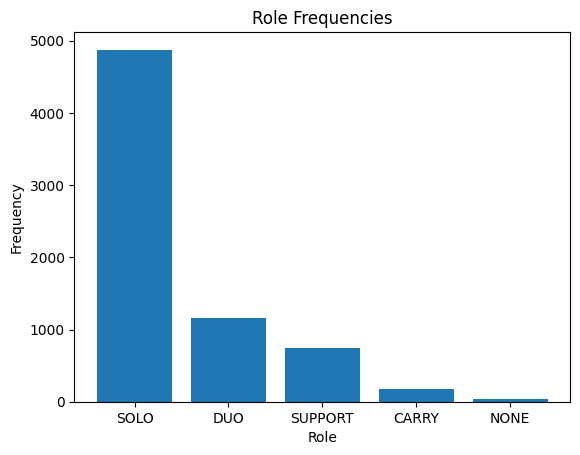

In [22]:
role_counts = gold['role'].value_counts()
print(role_counts)
plt.bar(role_counts.index, role_counts.values)
plt.title('Role Frequencies')
plt.xlabel('Role')
plt.ylabel('Frequency')
plt.show()

In [23]:
gold[gold['role']=='NONE'].agg('mean')   # 대부분의 수치가 전체 데이터의 평균보다 살짝 높거나 비슷하다. lane = NONE 인 건 큰 의미가 없는 것 같다.

<ipython-input-23-f42480ce0663>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  gold[gold['role']=='NONE'].agg('mean')   # 대부분의 수치가 전체 데이터의 평균보다 살짝 높거나 비슷하다. lane = NONE 인 건 큰 의미가 없는 것 같다.


assists              7.970588
kills                9.676471
deaths               5.529412
champExp         16029.352941
gold             13747.617647
tDDealt         157406.029412
tDDealtChamp     25017.235294
tDTaken          25042.000000
tMKilled           183.058824
turKills             2.000000
win                  1.000000
division             2.352941
dtype: float64

### **1-1-9. gold**

count     6986.000000
mean     12390.600344
std       3706.821538
min        500.000000
25%      10033.500000
50%      12317.500000
75%      14644.500000
max      28424.000000
Name: gold, dtype: float64


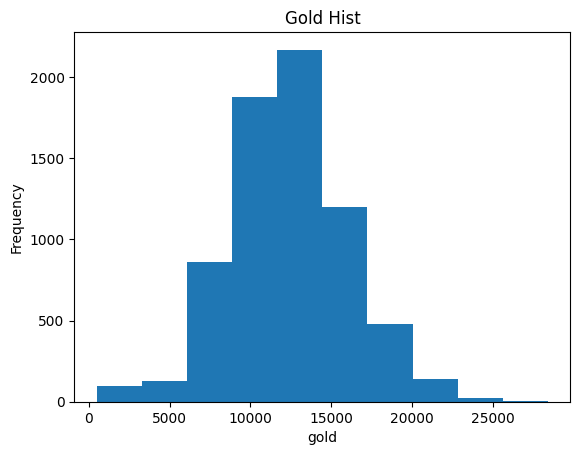

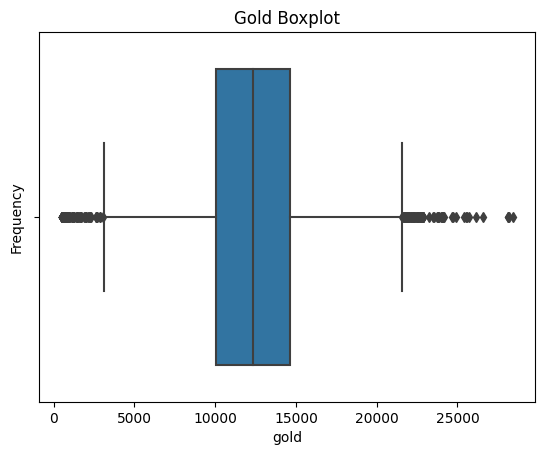

In [24]:
print(gold['gold'].describe())

plt.hist(gold['gold'])
plt.title('Gold Hist')
plt.xlabel('gold')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x=gold['gold'])
plt.title('Gold Boxplot')
plt.xlabel('gold')
plt.ylabel('Frequency')
plt.show()

# 약간 right-skewed
# 대충 1만 ~ 14000 정도 

### **1-1-10. teamPos**

In [25]:
gold.groupby('teamPos')['teamPos'].count()
# teamPos == 'MIDDLE' 인 데이터만 잘 뽑혔다. 
# 변수 삭제할 것.

teamPos
MIDDLE    6986
Name: teamPos, dtype: int64

### **1-1-11. tDDealt** 

count      6986.000000
mean     141390.042084
std       63176.388944
min           0.000000
25%       98368.250000
50%      132482.000000
75%      176332.500000
max      601038.000000
Name: tDDealt, dtype: float64


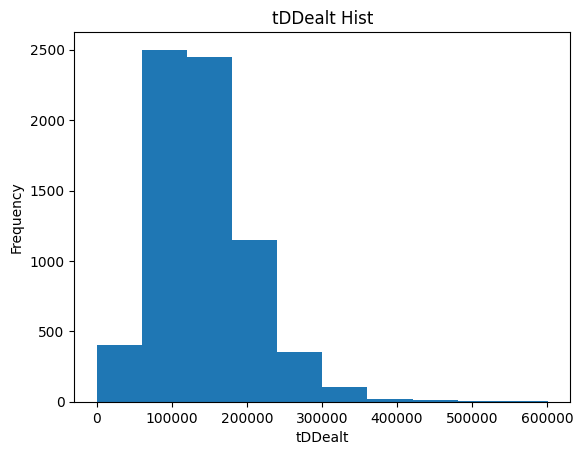

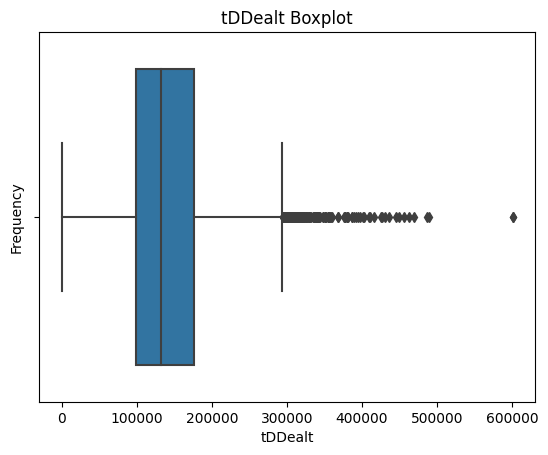

In [26]:
print(gold['tDDealt'].describe())

plt.hist(gold['tDDealt'])
plt.title('tDDealt Hist')
plt.xlabel('tDDealt')
plt.ylabel('Frequency')
plt.show()

# right skewed 

sns.boxplot(x=gold['tDDealt'])
plt.title('tDDealt Boxplot')
plt.xlabel('tDDealt')
plt.ylabel('Frequency')
plt.show()

# right-skewed


### **1-1-12. tDDealtChamp** 

count     6986.000000
mean     22914.335385
std      11874.063834
min          0.000000
25%      14638.250000
50%      21065.000000
75%      29189.250000
max      96909.000000
Name: tDDealtChamp, dtype: float64


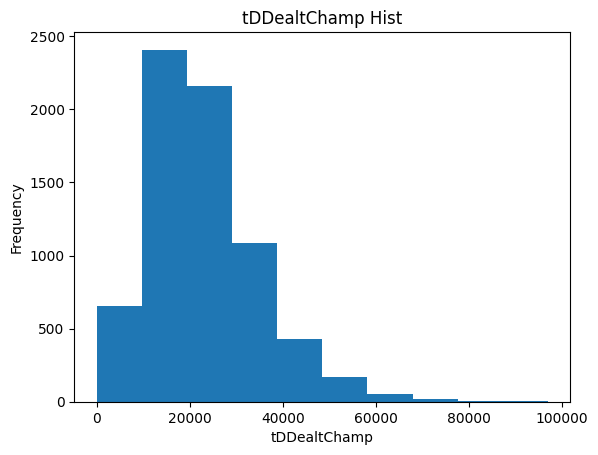

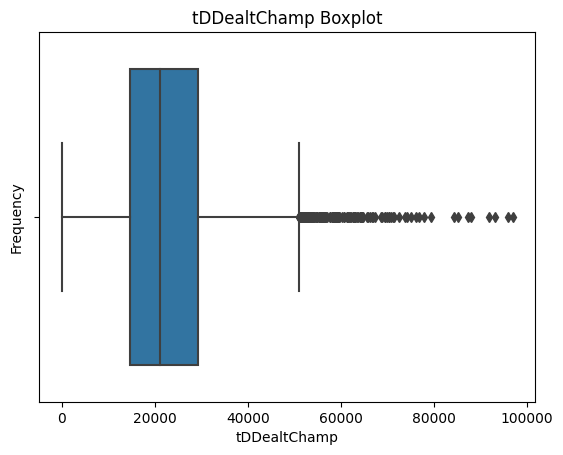

In [27]:
print(gold['tDDealtChamp'].describe())

plt.hist(gold['tDDealtChamp'])
plt.title('tDDealtChamp Hist')
plt.xlabel('tDDealtChamp')
plt.ylabel('Frequency')
plt.show()

# right skewed 

sns.boxplot(x=gold['tDDealtChamp'])
plt.title('tDDealtChamp Boxplot')
plt.xlabel('tDDealtChamp')
plt.ylabel('Frequency')
plt.show()

# right-skewed

### **1-1-13. tDTaken**

count     6986.000000
mean     21805.623819
std      10852.467064
min          0.000000
25%      13932.000000
50%      20423.500000
75%      28058.750000
max      87349.000000
Name: tDTaken, dtype: float64


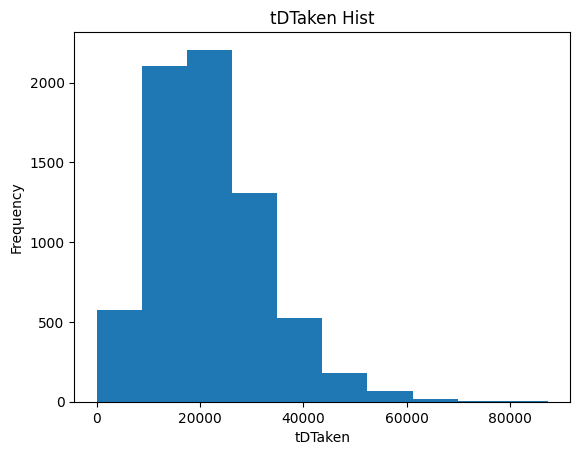

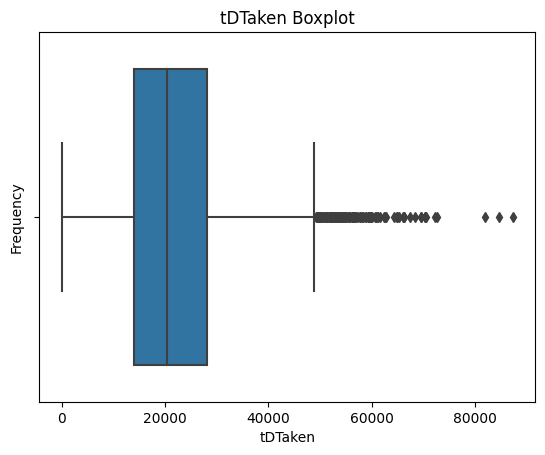

In [28]:
print(gold['tDTaken'].describe())

plt.hist(gold['tDTaken'])
plt.title('tDTaken Hist')
plt.xlabel('tDTaken')
plt.ylabel('Frequency')
plt.show()

# right skewed 

sns.boxplot(x=gold['tDTaken'])
plt.title('tDTaken Boxplot')
plt.xlabel('tDTaken')
plt.ylabel('Frequency')
plt.show()

# right-skewed

### **1-1-14. tMKilled**

count    6986.000000
mean      175.825794
std        50.315265
min         0.000000
25%       143.000000
50%       174.000000
75%       206.000000
max       390.000000
Name: tMKilled, dtype: float64


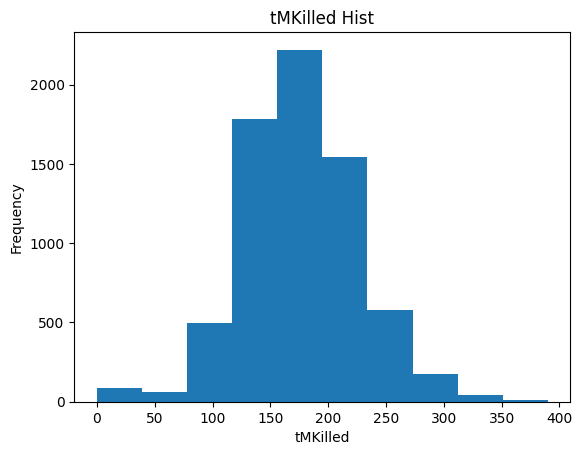

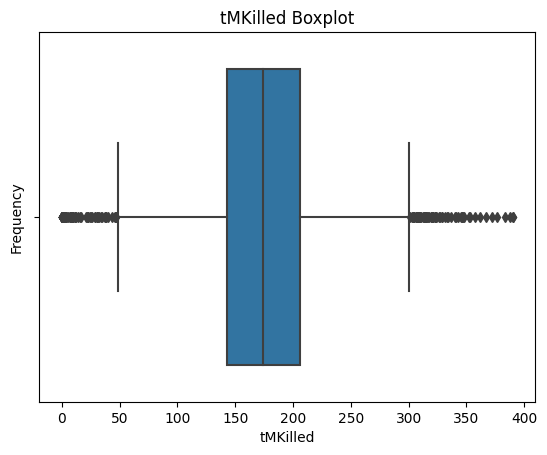

In [29]:
print(gold['tMKilled'].describe())

plt.hist(gold['tMKilled'])
plt.title('tMKilled Hist')
plt.xlabel('tMKilled')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x=gold['tMKilled'])
plt.title('tMKilled Boxplot')
plt.xlabel('tMKilled')
plt.ylabel('Frequency')
plt.show()

### **1-1-15.turKills** 

In [30]:
print(gold['turKills'].describe()) # 0~9의 정수

count    6986.000000
mean        1.519038
std         1.374268
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: turKills, dtype: float64


Text(0, 0.5, 'Frequency')

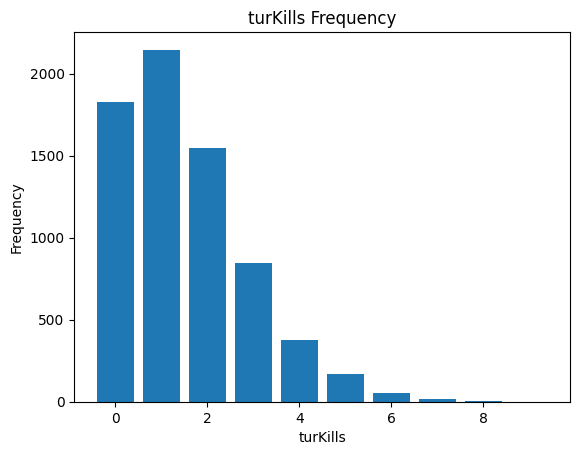

In [31]:
turkills_count = gold['turKills'].value_counts()
plt.bar(turkills_count.index, turkills_count.values)
plt.title('turKills Frequency')
plt.xlabel('turKills')
plt.ylabel('Frequency')

### **1-1-16. division**

3    1871
1    1812
2    1725
4    1578
Name: division, dtype: int64


Text(0, 0.5, 'Frequency')

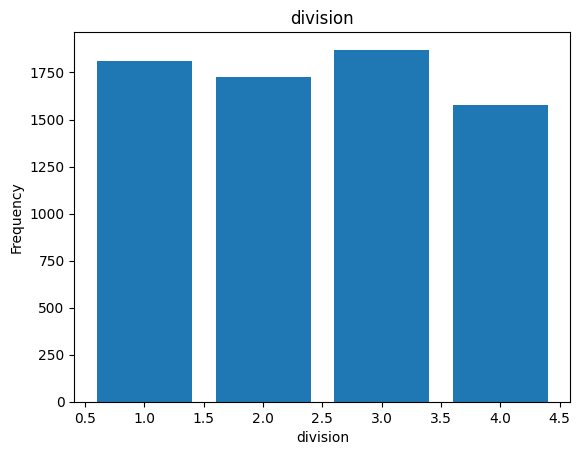

In [33]:
print(gold['division'].value_counts())
division_count = gold['division'].value_counts()
plt.bar(division_count.index, division_count.values)
plt.title('division')
plt.xlabel('division')
plt.ylabel('Frequency')   # 대부분 비슷

### 일원 변수 분석 요약 
    1. assists : 평균 7.4정도, right-skewed 
    2. kills : 평균 8정도, right-skewed 
    3. deaths : 평균 4.45정도, right-skewed 
    4. champExp : 평균 14900정도, 약간 right-skewed 
    5. champName
    - 총 135종 중에서 빈도수 10미만이 58종 -> 삭제 고려
    - Champion Data 에 없는 챔피언 -> 삭제해야함 
    6. indiPos 
    - 인덱스 806 -> 삭제 고려(허수)
    - 인덱스 2224도 삭제 고려(허수)
    - indiPos 와 lane 이 둘 다 MIDDLE 이 아니라면 -> 해석 어떻게? teamPos 가 MIDDLE 이라는 이유로 MIDDLE 로 보는 것이 합당?
    7. lane
    - MIDDLE 이 아닌 데이터가 많은데 lane 변수의 중요도가 어느정도 되는지 알아야할 것 같음
    - NONE 값을 가지는 애들은 변수들의 평균이 전체 데이터 절반 이하수준- > 해석을 어떻게 해야할지? 
    8. role 
    - SOLO 가 4875개정도(대부분이 이것) 
    - 데이터 불균형이 심한데 어떻게 다루어야할지? 
    - SOLO 이외에 다른것들은 삭제해야하나?
    9. gold
    - 1만 ~ 14000 정도, 약간right-skewed 
    - gold 값 너무 적은 것 -> 어떻게 해석해야?
    10. teamPos
    - 모두 MIDDLE 이니 변수삭제 
    11. tDDealt
    - 평균 141000정도, right-skewed 
    12. tDDealtChamp
    - 평균 23000정도, right-skewed 
    13. tDTaken
    - 평균 22000정도, right-skewed 
    14. tMKilled 
    - 평균 175 정도
    15. turKills
    -  0,1 2 가 대다수 
    16. division : 비슷비슷

## **1-2.이원 변수 분석**


In [33]:
# 챔피언 데이터 클러스터링 하고 나서..